In [1]:
# Change the current working directory
import os

os.chdir("C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data")

In [2]:
# Get the current working directory

os.getcwd()

'C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data'

In [3]:
#Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
#Loading datasets

Inventory = pd.read_csv("C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data\\inventory.csv")
Products = pd.read_csv("C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data\\products.csv")
Sales = pd.read_csv("C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data\\sales.csv")
Stores = pd.read_csv("C:\\Users\\Dell 3400\\Desktop\\Projects\\Toy_Sales_Analysis_Python\\Raw Data\\stores.csv")

## Displaying all tables to identify and compare common columns*

In [5]:
Inventory.head(5)

,Store_ID,Product_ID,Stock_On_Hand
0,1,1,27
1,1,2,0
2,1,3,32
3,1,4,6
4,1,5,0


In [6]:
Products.head(5)

,Product_ID,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Action Figure,Toys,$9.99,$15.99
1,2,Animal Figures,Toys,$9.99,$12.99
2,3,Barrel O' Slime,Art & Crafts,$1.99,$3.99
3,4,Chutes & Ladders,Games,$9.99,$12.99
4,5,Classic Dominoes,Games,$7.99,$9.99


In [7]:
Sales.head(5)

,Sale_ID,Date,Store_ID,Product_ID,Units
0,1,2017-01-01,24,4,1
1,2,2017-01-01,28,1,1
2,3,2017-01-01,6,8,1
3,4,2017-01-01,48,7,1
4,5,2017-01-01,44,18,1


In [8]:
Stores.head(5)

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18
1,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27
2,3,Maven Toys Guadalajara 2,Guadalajara,Commercial,1999-12-27
3,4,Maven Toys Saltillo 1,Saltillo,Downtown,2000-01-01
4,5,Maven Toys La Paz 1,La Paz,Downtown,2001-05-31


**Findings-**
*   Store_ID is common in Inventory, Sales & Stores.
*   Product_ID is common in Inventory, Products & Sales.

# **Merging all Datasets**

In [9]:
ProductInventory = pd.merge(Inventory,Products,on="Product_ID",how="outer")

In [10]:
SalesProductInventory = pd.merge(Sales, ProductInventory, on=["Store_ID",'Product_ID'], how="outer")

In [11]:
MF = pd.merge(Stores,SalesProductInventory,on="Store_ID",how="outer")

In [12]:
#Checking shape of dataset
MF.shape

(829265, 14)

In [13]:
#Displaying final merged file
MF.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,$7.99,$8.99
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,$7.99,$8.99


In [14]:
#Checking summary of final file
MF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829265 entries, 0 to 829264
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Store_ID          829265 non-null  int64  
 1   Store_Name        829265 non-null  object 
 2   Store_City        829265 non-null  object 
 3   Store_Location    829265 non-null  object 
 4   Store_Open_Date   829265 non-null  object 
 5   Sale_ID           829262 non-null  float64
 6   Date              829262 non-null  object 
 7   Product_ID        829265 non-null  int64  
 8   Units             829262 non-null  float64
 9   Stock_On_Hand     823033 non-null  float64
 10  Product_Name      823033 non-null  object 
 11  Product_Category  823033 non-null  object 
 12  Product_Cost      823033 non-null  object 
 13  Product_Price     823033 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 94.9+ MB


# **MISSING VALUES**

In [15]:
# Check for missing values in the DataFrame
missing_values = MF.isnull().sum();

# Print or display the missing values count for each column
print(missing_values)

Store_ID               0
Store_Name             0
Store_City             0
Store_Location         0
Store_Open_Date        0
Sale_ID                3
Date                   3
Product_ID             0
Units                  3
Stock_On_Hand       6232
Product_Name        6232
Product_Category    6232
Product_Cost        6232
Product_Price       6232
dtype: int64


**Findings-**

Missing Values found in 8 columns (namely- Sales_ID, Date, Units, Stock_On_Hand, Product_Name, Product_Category, Product_Cost, Product_Price)

In [16]:
#Adjusting Display Settings for Maximum Columns
pd.set_option('display.max_columns', None)

In [17]:
#Checking null values in column-Sale_ID
MF[MF['Sale_ID'].isnull()]

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
238841,14,Maven Toys Guanajuato 1,Guanajuato,Downtown,2007-01-31,NaN,NaN,26,NaN,3.0,PlayDoh Playset,Art & Crafts,$20.99,$24.99
440631,27,Maven Toys Oaxaca 1,Oaxaca,Downtown,2010-10-02,NaN,NaN,26,NaN,6.0,PlayDoh Playset,Art & Crafts,$20.99,$24.99
472394,29,Maven Toys Xalapa 1,Xalapa,Commercial,2011-06-21,NaN,NaN,33,NaN,6.0,Teddy Bear,Toys,$10.99,$12.99


**Findings-**

3 stores have 0 stock for some products because of which dataset is showing null values for Sale_ID, Date & Units.

In [18]:
#TestMergedFile=MF.drop([238841, 440631, 472394])
#TestMergedFile[TestMergedFile['Sale_ID'].isnull()]

In [19]:
#Removing rows where stock on hand is 0.
MergedFile = MF[~MF['Sale_ID'].isnull()]

#Rechecking Missing Values in Sale_ID column
MergedFile[MergedFile['Sale_ID'].isnull()]

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price


In [20]:
#Rechecking Missing Values in the dataset
new_missing_value = MergedFile.isnull().sum();

print (new_missing_value)

Store_ID               0
Store_Name             0
Store_City             0
Store_Location         0
Store_Open_Date        0
Sale_ID                0
Date                   0
Product_ID             0
Units                  0
Stock_On_Hand       6232
Product_Name        6232
Product_Category    6232
Product_Cost        6232
Product_Price       6232
dtype: int64


**Findings-**

Missing Values found in 5 columns (namely- Stock_On_Hand, Product_Name, Product_Category, Product_Cost, Product_Price)

In [21]:
#Checking null values in column-Stock_On_Hand
MergedFile[MergedFile['Stock_On_Hand'].isnull()].head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
28060,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,143683.0,2017-05-16,16,1.0,NaN,NaN,NaN,NaN,NaN
28061,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,143687.0,2017-05-16,16,1.0,NaN,NaN,NaN,NaN,NaN
28062,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,143908.0,2017-05-16,16,1.0,NaN,NaN,NaN,NaN,NaN
28063,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,161143.0,2017-05-31,16,1.0,NaN,NaN,NaN,NaN,NaN
28064,2,Maven Toys Monterrey 1,Monterrey,Residential,1995-04-27,161174.0,2017-05-31,16,1.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#Checking Product_ID of the Out of Stock products.
unique_null_stock_ids = MergedFile.loc[MergedFile['Stock_On_Hand'].isnull(), 'Product_ID'].unique()
print(unique_null_stock_ids)

[16 20  5 35  4 22 29 23]


**Findings-**

8 products have went Out Stock after sale and store is yet to restock Product_IDs- 4, 5, 16, 20, 22, 23, 29, 35.

In [23]:
#Changing all NaN value to 0 for column Stock_On_Hand
MergedFile.loc[MergedFile['Stock_On_Hand'].isnull(), 'Stock_On_Hand'] = 0

# Replacing NaN values for Product_Name, Product_Category, Product_Cost & Product_Price via 'Product_ID' as a common column between 'MergedFile' and 'Product'
MergedFile['Product_Name'] = MergedFile['Product_Name'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['Product_Name']))
MergedFile['Product_Category'] = MergedFile['Product_Category'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['Product_Category']))
MergedFile['Product_Cost'] = MergedFile['Product_Cost'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['Product_Cost']))
MergedFile['Product_Price'] = MergedFile['Product_Price'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['Product_Price']))

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\2518833657.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Product_Name'] = MergedFile['Product_Name'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['Product_Name']))
C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\2518833657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Product_Category'] = MergedFile['Product_Category'].fillna(MergedFile['Product_ID'].map(Products.set_index('Product_ID')['P

In [24]:
#Rechecking Missing Values in the dataset.
new_missing_value1 = MergedFile.isnull().sum();

print (new_missing_value1)

Store_ID            0
Store_Name          0
Store_City          0
Store_Location      0
Store_Open_Date     0
Sale_ID             0
Date                0
Product_ID          0
Units               0
Stock_On_Hand       0
Product_Name        0
Product_Category    0
Product_Cost        0
Product_Price       0
dtype: int64


# **Summary-**

**Products that were out of stock for year 2017-2018 -**
*   PlayDoh Playset (Product_ID- 26) at Maven Toys Guanajuato 1
*   PlayDoh Playset (Product_ID- 26) at Maven Toys Oaxaca 1
*   Teddy Bear (Product_ID- 33) at Maven Toys Xalapa 1


**Products that went out of stock after last sale and is yet to be restocked -**
*   Chutes & Ladders (Product_ID- 4)
*   Classic Dominoes (Product_ID- 5)
*   Jenga (Product_ID- 16)
*   Mini Basketball Hoop (Product_ID- 20)
*   Monopoly (Product_ID- 22)
*   Mr. Potatohead (Product_ID- 23)
*   Plush Pony (Product_ID- 29)
*   Uno Card Game (Product_ID- 35)

# **Outlier Treatment**

In [25]:
#Removing $ and spaces to avoid calculation issues

MergedFile["Product_Price"] = pd.to_numeric(MergedFile["Product_Price"].str.replace("$", ""), errors ='coerce')
MergedFile["Product_Cost"] = pd.to_numeric(MergedFile["Product_Cost"].str.replace("$", ""), errors= 'coerce')

MergedFile.head()

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\69184646.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  MergedFile["Product_Price"] = pd.to_numeric(MergedFile["Product_Price"].str.replace("$", ""), errors ='coerce')
C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\69184646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile["Product_Price"] = pd.to_numeric(MergedFile["Product_Price"].str.replace("$", ""), errors ='coerce')
C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\69184646.py:4: FutureWarning: The default value of regex will change from True to False in

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99


In [26]:
MergedFile.head()

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99


# **Method Used for Treating Outliers**

**L2 normalization** is like resizing a vector (list of numbers) to have a length of 1 while maintaining the direction of the original vector. It's a way to make sure that the values are scaled proportionally in a manner that the overall "magnitude" is 1. This is useful in various mathematical and machine learning contexts.


**L2 Normalization Formula-**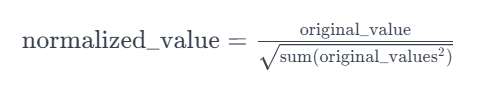

**Outlier Treatment on Product Cost**

In [27]:
# Calculate mean, standard deviation, and 3 times the standard deviation

PC_mean = MergedFile['Product_Cost'].mean()
PC_std_deviation = MergedFile['Product_Cost'].std()
PC_Minimum_Value = MergedFile['Product_Cost'].min()
PC_Maximum_Value = MergedFile['Product_Cost'].max()

print("Mean:", PC_mean)
print("Standard Deviation:", PC_std_deviation)
print("Minimum Value:", PC_Minimum_Value)
print("Maximum Value:", PC_Maximum_Value)

Mean: 9.976460250198377
Standard Deviation: 7.817748541982314
Minimum Value: 1.99
Maximum Value: 34.99


In [28]:
PC_array = MergedFile['Product_Cost']

PC_normalized_arr = preprocessing.normalize([PC_array])

# Add a new column 'Product_Cost_Normalized' to the existing dataset
MergedFile['Product_Cost_Normalized'] = PC_normalized_arr.flatten()

# Print the MergedFile with the new column
MergedFile.head()

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\1204364562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Product_Cost_Normalized'] = PC_normalized_arr.flatten()


,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Cost_Normalized
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692


**Outlier Treatment on Product Price**

In [29]:
# Calculate mean, standard deviation, and 3 times the standard deviation

PP_mean = MergedFile['Product_Price'].mean()
PP_std_deviation = MergedFile['Product_Price'].std()
PP_Minimum_Value = MergedFile['Product_Price'].min()
PP_Maximum_Value = MergedFile['Product_Price'].max()

print("Mean:", PP_mean)
print("Standard Deviation:", PP_std_deviation)
print("Minimum Value:", PP_Minimum_Value)
print("Maximum Value:", PP_Maximum_Value)

Mean: 13.772326936480878
Standard Deviation: 8.664793700471606
Minimum Value: 2.99
Maximum Value: 39.99


In [30]:
PP_array = MergedFile['Product_Price']

PP_normalized_arr = preprocessing.normalize([PP_array])

# Add a new column 'Product_Cost_Normalized' to the existing dataset
MergedFile['Product_Price_Normalized'] = PP_normalized_arr.flatten()

# Print the MergedFile with the new column
MergedFile.head()

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\266363982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Product_Price_Normalized'] = PP_normalized_arr.flatten()


,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Cost_Normalized,Product_Price_Normalized
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607


**Outlier Treatment on Units**

In [31]:
# Calculate mean, standard deviation, and 3 times the standard deviation

Units_mean = MergedFile['Units'].mean()
Units_std_deviation = MergedFile['Units'].std()
Units_Minimum_Value = MergedFile['Units'].min()
Units_Maximum_Value = MergedFile['Units'].max()

print("Mean:", Units_mean)
print("Standard Deviation:", Units_std_deviation)
print("Minimum Value:", Units_Minimum_Value)
print("Maximum Value:", Units_Maximum_Value)

Mean: 1.3151030675468067
Standard Deviation: 0.830701243069464
Minimum Value: 1.0
Maximum Value: 30.0


In [32]:
Units_array = MergedFile['Units']

Units_normalized_arr = preprocessing.normalize([Units_array])

# Add a new column 'Product_Cost_Normalized' to the existing dataset
MergedFile['Units_Normalized'] = Units_normalized_arr.flatten()

# Print the MergedFile with the new column
MergedFile.head()

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\4000798222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Units_Normalized'] = Units_normalized_arr.flatten()


,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Cost_Normalized,Product_Price_Normalized,Units_Normalized
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706


# **Univariate Analysis And Feature Engineering**

**Adding columns for Feature Engineering**

In [33]:
#Month Column
MergedFile['Month']= pd.DatetimeIndex(MergedFile['Date']).month

#Sales Column
MergedFile['Product_Price']=MergedFile['Product_Price'].astype(float)
MergedFile['Sales']=round(MergedFile['Units'] * MergedFile['Product_Price'])

MergedFile.head()

C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\1106257966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Month']= pd.DatetimeIndex(MergedFile['Date']).month
C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\1106257966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MergedFile['Product_Price']=MergedFile['Product_Price'].astype(float)
C:\Users\Dell 3400\AppData\Local\Temp\ipykernel_23404\1106257966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Store_ID,Store_Name,Store_City,Store_Location,Store_Open_Date,Sale_ID,Date,Product_ID,Units,Stock_On_Hand,Product_Name,Product_Category,Product_Cost,Product_Price,Product_Cost_Normalized,Product_Price_Normalized,Units_Normalized,Month,Sales
0,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,6.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706,1,9.0
1,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,87.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706,1,9.0
2,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,420.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706,1,9.0
3,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,637.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706,1,9.0
4,1,Maven Toys Guadalajara 1,Guadalajara,Residential,1992-09-18,745.0,2017-01-01,31,1.0,7.0,Splash Balls,Sports & Outdoors,7.99,8.99,0.000692,0.000607,0.000706,1,9.0


In [34]:
MergedFile.dtypes

Store_ID                      int64
Store_Name                   object
Store_City                   object
Store_Location               object
Store_Open_Date              object
Sale_ID                     float64
Date                         object
Product_ID                    int64
Units                       float64
Stock_On_Hand               float64
Product_Name                 object
Product_Category             object
Product_Cost                float64
Product_Price               float64
Product_Cost_Normalized     float64
Product_Price_Normalized    float64
Units_Normalized            float64
Month                         int64
Sales                       float64
dtype: object

In [35]:
MergedFile['Sales'].describe()

count    829262.000000
mean         17.431738
std          15.526597
min           3.000000
25%           9.000000
50%          15.000000
75%          20.000000
max         880.000000
Name: Sales, dtype: float64

In [36]:
MergedFile['Product_Price'].describe()

count    829262.000000
mean         13.772327
std           8.664794
min           2.990000
25%           6.990000
50%          12.990000
75%          15.990000
max          39.990000
Name: Product_Price, dtype: float64

Text(0.5, 1.0, 'Price')

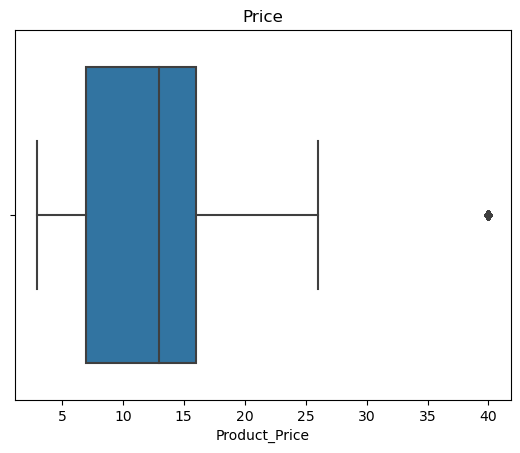

In [37]:
# Product Price Analysis
sns.boxplot(x=MergedFile['Product_Price'])
plt.title('Price')

# **Categorical Features**

In [38]:
#Product Categories
MergedFile['Product_Category'].unique()

array(['Sports & Outdoors', 'Electronics', 'Toys', 'Games',
       'Art & Crafts'], dtype=object)

In [39]:
#Units Sold per Category
print(MergedFile.groupby("Product_Category")["Units"].count())

Product_Category
Art & Crafts         220673
Electronics           99025
Games                157006
Sports & Outdoors    131331
Toys                 221227
Name: Units, dtype: int64


In [40]:
#Average Sales per Category
print(MergedFile.groupby("Product_Category")["Sales"].mean())

Product_Category
Art & Crafts         12.274361
Electronics          22.702469
Games                14.195528
Sports & Outdoors    16.553974
Toys                 23.034770
Name: Sales, dtype: float64


In [41]:
#Total Sales per Category
print(MergedFile.groupby("Product_Category")["Sales"].sum())

Product_Category
Art & Crafts         2708620.0
Electronics          2248112.0
Games                2228783.0
Sports & Outdoors    2174050.0
Toys                 5095913.0
Name: Sales, dtype: float64


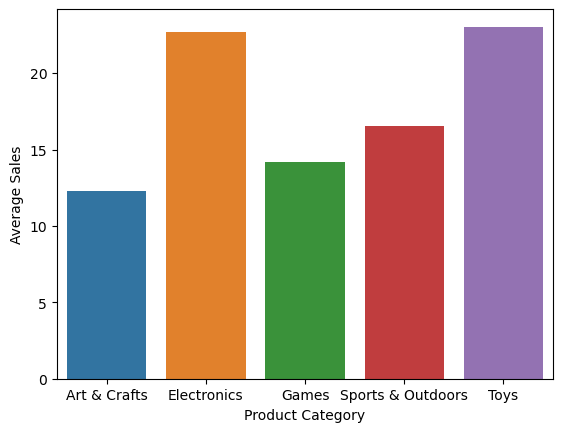

In [42]:
#BarPlot showing Average Sales for each Category
aggr_data = MergedFile.groupby('Product_Category')['Sales'].mean().reset_index();
sns.barplot(x='Product_Category', y='Sales',data=aggr_data)
plt.xlabel("Product Category")
plt.ylabel("Average Sales")
plt.show()

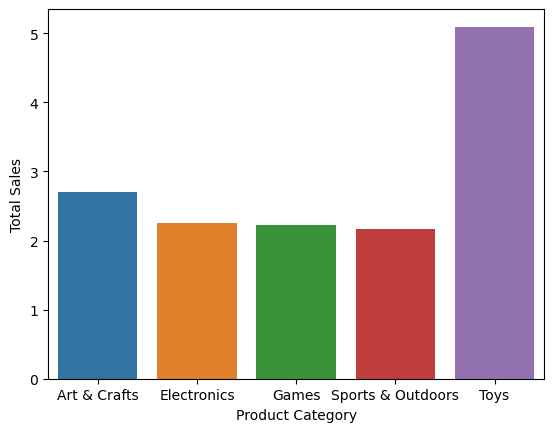

In [43]:
#Product_Category and Total Sales
aggr_data = MergedFile.groupby('Product_Category')['Sales'].sum().reset_index()
aggr_data['Sales_M'] = aggr_data['Sales']/1000000

sns.barplot(x='Product_Category', y='Sales_M',data=aggr_data)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.show()

In [44]:
#Products
MergedFile['Product_Name'].nunique()

35

In [45]:
MergedFile['Product_Name'].unique()

array(['Splash Balls', 'Mini Ping Pong Set', 'Toy Robot', 'Action Figure',
       'Dinosaur Figures', 'Deck Of Cards', 'PlayDoh Toolkit',
       'Lego Bricks', 'Classic Dominoes', 'Kids Makeup Kit', 'Dino Egg',
       'Monopoly', 'Glass Marbles', 'Colorbuds', 'Dart Gun',
       "Rubik's Cube", 'Chutes & Ladders', 'Teddy Bear', 'Animal Figures',
       'PlayDoh Can', 'Nerf Gun', 'Hot Wheels 5-Pack', 'Uno Card Game',
       'Supersoaker Water Gun', 'Mini Basketball Hoop', 'PlayDoh Playset',
       'Plush Pony', 'Jenga', 'Gamer Headphones', "Barrel O' Slime",
       'Magic Sand', 'Etch A Sketch', 'Mr. Potatohead',
       'Foam Disk Launcher', 'Playfoam'], dtype=object)

In [46]:
#Average Sales at each Location.
print(MergedFile.groupby("Store_Location")["Sales"].mean())

Store_Location
Airport        18.853981
Commercial     17.766417
Downtown       17.129250
Residential    17.286578
Name: Sales, dtype: float64


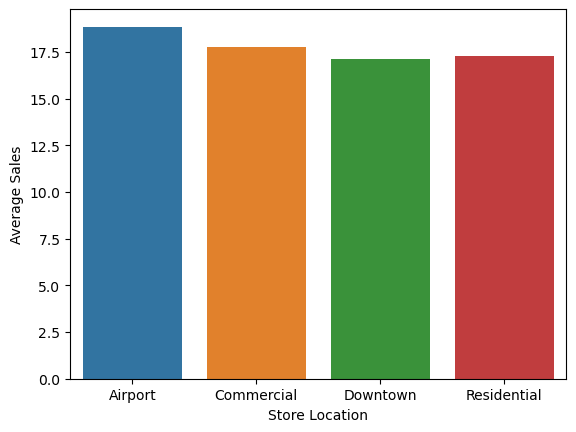

In [47]:
#Barplot for Store Location and Average Sales.
aggr_data = MergedFile.groupby('Store_Location')['Sales'].mean().reset_index()
sns.barplot(x='Store_Location', y='Sales', data=aggr_data)
plt.xlabel("Store Location")
plt.ylabel("Average Sales")
plt.show()

**Summary of Univariate Analysis**
1.	Maximum number of units are sold in Toys Category, followed by Arts and Crafts. Also, toys accounts for highest Total Sales.
2. Electronics accounts for highest average sales among Product Categories.
3.	Electronics and Games have the lowest total sales among all categories.
4.	There are total of 35 Unique Products.
5.	Downtown sold the maximum quantities while Airport accounts for least number of quantities that are sold.
6.	 Store Locations doesnot have any significant impact on average sales.

# **Bivariate Analysis**

**Agenda:** Finding Correlations between Sales and other Variables.

In [48]:
#Pearson coefficient between Sales & Product Prie
MergedFile[['Sales','Product_Cost']].corr(method='pearson')

,Sales,Product_Cost
Sales,1.000000,0.635539
Product_Cost,0.635539,1.000000


**Inference-** There is a positive correlation between Sales and Product Cost.

In [49]:
# Sales & Stock_On_Hand
MergedFile[['Sales','Stock_On_Hand']].corr(method='pearson')

,Sales,Stock_On_Hand
Sales,1.00000,-0.07969
Stock_On_Hand,-0.07969,1.00000


**Inference-** There is a negative correlation between Sales and Stock on Hand.

In [50]:
# Sales and Month
MergedFile[['Sales','Month']].corr(method='pearson')

,Sales,Month
Sales,1.000000,-0.026523
Month,-0.026523,1.000000


**Inference-** There is a negative but **weak** correlation between Sales and Month.

In [51]:
#Correlation for Number of Units Sold
MergedFile[['Units','Month','Stock_On_Hand','Product_Price']].corr(method='pearson')

,Units,Month,Stock_On_Hand,Product_Price
Units,1.000000,-0.008336,0.071421,-0.096340
Month,-0.008336,1.000000,-0.002916,-0.016262
Stock_On_Hand,0.071421,-0.002916,1.000000,-0.180476
Product_Price,-0.096340,-0.016262,-0.180476,1.000000


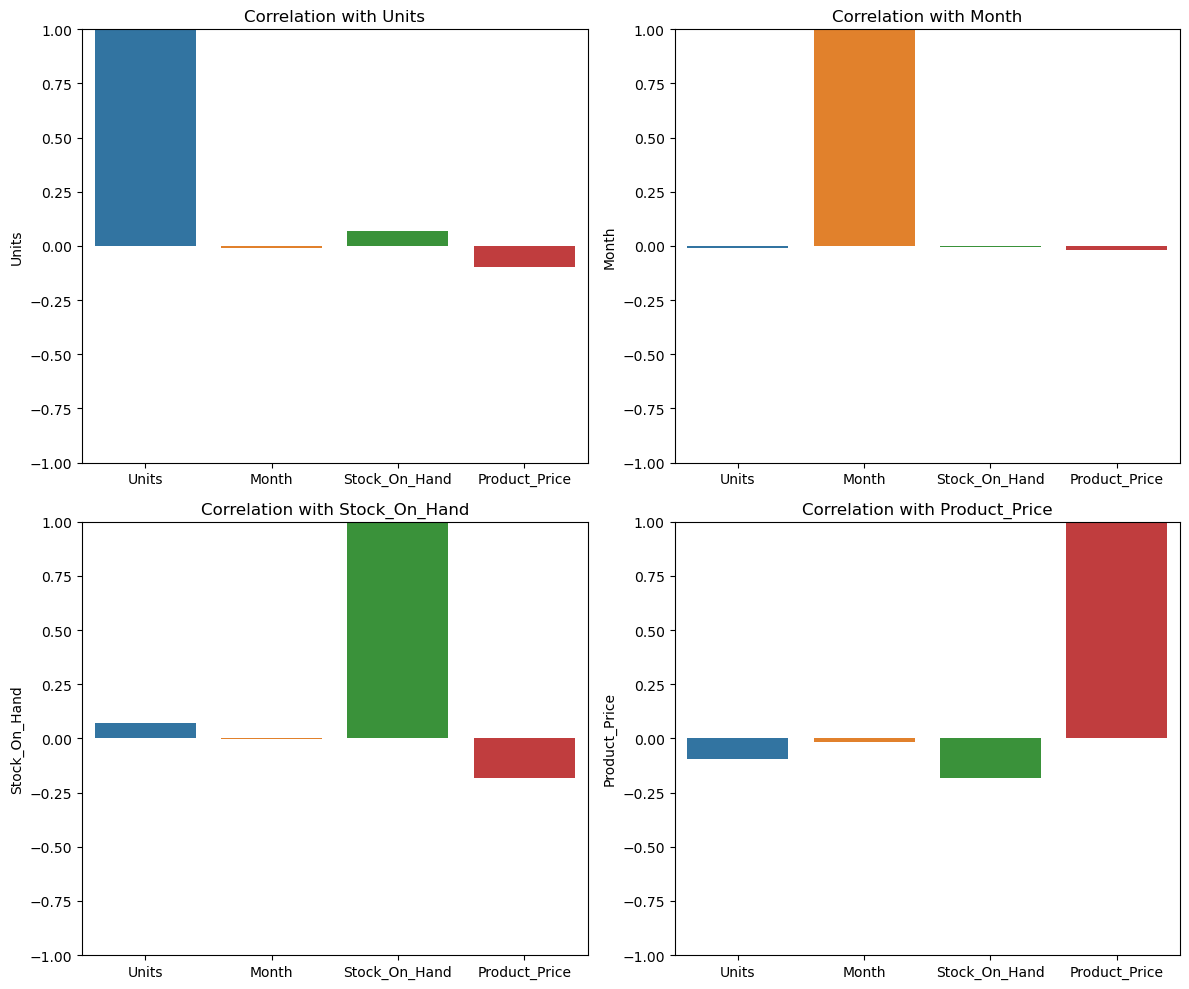

In [52]:
# Assuming MergedFile is your DataFrame
Corr = MergedFile[['Units', 'Month', 'Stock_On_Hand', 'Product_Price']].corr()

# Create subplots for each correlation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# List of variables to loop through
variables = ['Units', 'Month', 'Stock_On_Hand', 'Product_Price']

for i, variable in enumerate(variables):
    # Create a bar plot for the correlation with the current variable
    sns.barplot(x=Corr.index, y=Corr[variable], ax=axes[i])
    
    # Set plot title
    axes[i].set_title(f'Correlation with {variable}')

    # Set y-axis limits to match the desired range from -1 to 1
    axes[i].set_ylim(-1, 1)

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: >

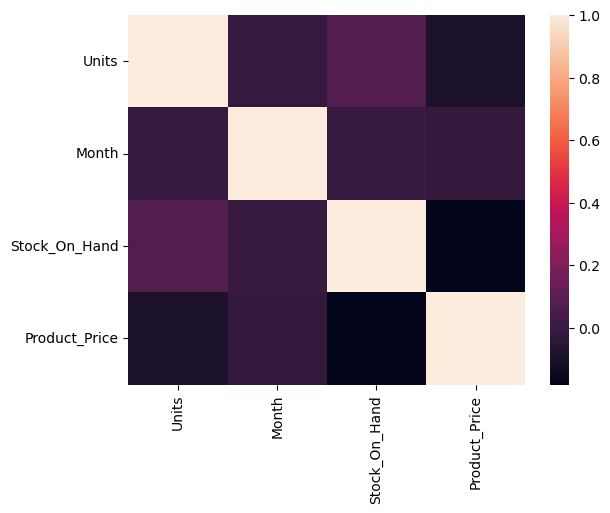

In [53]:
Corr=MergedFile[['Units','Month','Stock_On_Hand','Product_Price']].corr()
sns.heatmap(Corr,
            xticklabels=Corr.columns.values,
            yticklabels=Corr.columns.values)

**Summary of Bivariate Analysis**
1. There is a significant correlation between Sales and Product_Cost.
2. Also, Product Price and Sales have positive correlation.
3. Stock In hand and Month does not affect the overall Sales.
4. Number of Units Sold are not affected by Product Price.
5. Similarly, Stock in Hand and months does not influence  total sold units.

# **HYPOTHESIS TESTING**

**1.Test for Correlation Between Stocks On Hands and Sales Volume**

**Null Hypothesis:** H0= There is a strong Correlation Between Stock on Hand and Sales Volume

**Alternate Hypothesis:** H1= There is no strong Correlation Between Stock On Hand and Sales Volume

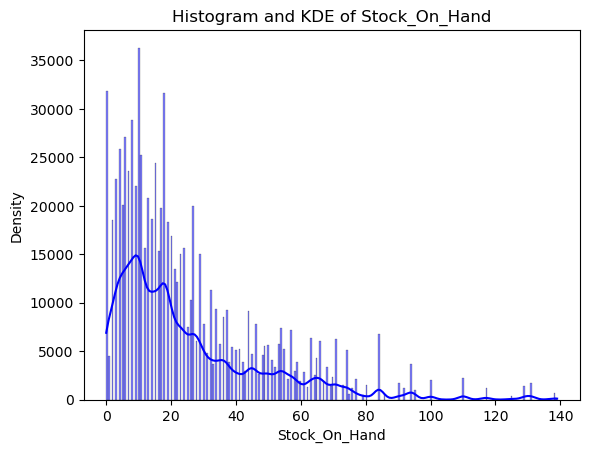

In [54]:
# Plotting Histogram and KDE of Stock_On_Hand
sns.histplot(MergedFile['Stock_On_Hand'], bins='auto', kde=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Stock_On_Hand')
plt.ylabel('Density')
plt.title('Histogram and KDE of Stock_On_Hand')

# Displaying the plot
plt.show()

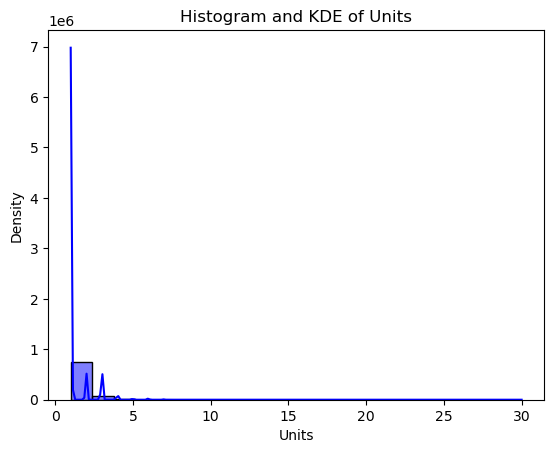

In [55]:
# Plotting Histogram and KDE of Units
sns.histplot(MergedFile['Units'], bins='auto', kde=True, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Units')
plt.ylabel('Density')
plt.title('Histogram and KDE of Units')

# Displaying the plot
plt.show()

In [56]:
# Calculate the Pearson correlation coefficient
correlation = MergedFile['Stock_On_Hand'].corr(MergedFile['Units'])

# Display the correlation coefficient
print(f'Pearson Correlation Coefficient: {correlation}')

# Check the strength of the correlation
if abs(correlation) > 0.7:
    print('There is a strong correlation between Stock on Hand and Sales Volume.')
else:
    print('There is not a strong correlation between Stock on Hand and Sales Volume.')

Pearson Correlation Coefficient: 0.07142073291877102
There is not a strong correlation between Stock on Hand and Sales Volume.


# **p-value-**

A p-value of 0.0 in the context of statistical testing usually means that the p-value is extremely small and has reached the precision limit of the computer. It doesn't literally mean the p-value is exactly zero, but rather that it's very close to zero.

In practical terms, when you see a p-value close to zero, it indicates strong evidence against the null hypothesis.

# **Table showing strength of correlation-**

> 0.0<0.1 - No Correlation

> 0.1<0.3 - Low Correlation

> 0.3<0.5 - Medium Correlation

> 0.5<0.7 - High Correlation

> 0.7<1 - Very High Correlation

**2. Test for finding influence on Sales at different Store Location.**

**Null Hypothesis:** H0= Store Location has strong influences on Sales.

**Alternate Hypothesis:** H1= Store Location donot have strong influences on Sales.

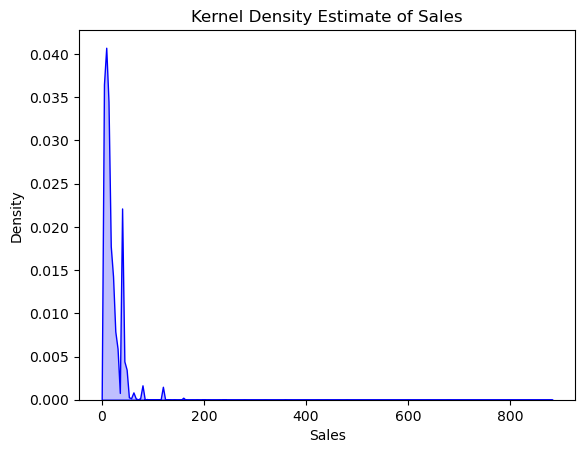

In [57]:
# Plotting KDE of Sales
sns.kdeplot(MergedFile['Sales'], color='blue', fill=True)

# Adding labels and title
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Sales')

# Displaying the plot
plt.show()

In [58]:
from scipy.stats import f_oneway

# Separate the sales data for each store location
Residential = MergedFile[MergedFile['Store_Location'] == 'Residential']['Sales']
Commercial = MergedFile[MergedFile['Store_Location'] == 'Commercial']['Sales']
Downtown = MergedFile[MergedFile['Store_Location'] == 'Downtown']['Sales']
Airport = MergedFile[MergedFile['Store_Location'] == 'Airport']['Sales']

# Perform the one-way ANOVA test
statistic, p_value = f_oneway(Residential, Commercial, Downtown,Airport)

# Display the results
print(f'One-way ANOVA Test: F-statistic={statistic}, p-value={p_value}')

# Check the significance of the results
if p_value < 0.05:
    print('There is a significant difference in sales between different store locations.')
else:
    print('There is no significant difference in sales between different store locations.')

One-way ANOVA Test: F-statistic=283.9115518080945, p-value=3.239408288754662e-184
There is a significant difference in sales between different store locations.


**Since, the density curve of Sales do not follow Normal Distribution therefore conclusions from Oneway ANOVA  cannot be taken into consideration. Hence,  Hypothesis Test is  further conducted using Kruskal Wallis Method.**

In [59]:
from scipy.stats import kruskal

# Separate the sales data for each store location
Residential = MergedFile[MergedFile['Store_Location'] == 'Residential']['Sales']
Commercial = MergedFile[MergedFile['Store_Location'] == 'Commercial']['Sales']
Downtown = MergedFile[MergedFile['Store_Location'] == 'Downtown']['Sales']
Airport = MergedFile[MergedFile['Store_Location'] == 'Airport']['Sales']

# Perform the Kruskal-Wallis H test
statistic, p_value = kruskal(Residential, Commercial, Downtown,Airport)

# Display the results
print(f'Kruskal-Wallis H Test: Statistic={statistic}, p-value={p_value}')

# Check the significance of the results
if p_value < 0.05:
    print('There is a significant difference in sales between different store locations.')
else:
    print('There is no significant difference in sales between different store locations.')

Kruskal-Wallis H Test: Statistic=828.3233210001104, p-value=3.1148676204715556e-179
There is a significant difference in sales between different store locations.


## **Multiple Linear Regression Model**

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting relevant features for prediction
features = ['Store_City', 'Store_Location','Product_ID', 'Units', 'Stock_On_Hand', 'Product_Cost', 'Product_Price']

# Assuming 'MergedFile' is your DataFrame
y = MergedFile['Sales']
X = MergedFile[features].copy()  # Create a copy to avoid SettingWithCopyWarning

# Ensure 'Store_City' and 'Store_Location' contain only categorical data
X.loc[:, 'Store_City'] = X['Store_City'].astype(str)
X.loc[:, 'Store_Location'] = X['Store_Location'].astype(str)

# Label encoding for categorical columns
label_encoder = LabelEncoder()
X['Store_City'] = label_encoder.fit_transform(X['Store_City'])
X['Store_Location'] = label_encoder.fit_transform(X['Store_Location'])

X.rename(columns = {'Store_City': 'Store_City_LE'}, inplace=True)
X.rename(columns = {'Store_Location': 'Store_Location_LE'}, inplace=True)

# Categorical columns
cat_cols = ['Store_City_LE', 'Store_City_LE']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline for encoding categorical variables and fitting the model
pipeline = Pipeline([
    ('one_hot_encoder', ColumnTransformer([
        ('one_hot_encoder', OneHotEncoder(drop='first'), cat_cols)
    ], remainder='passthrough')),
    ('regressor', LinearRegression())  # Using Linear Regression as the model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
predictions = pipeline.predict(X_test)

# Evaluate the model (use appropriate evaluation metrics)
r_squared = pipeline.score(X_test, y_test)
print(f"R-squared score: {r_squared}")

R-squared score: 0.8110368672438331


R squared (R2) is a regression error metric that justifies the performance of the model. It represents the value of how much the independent variables are able to describe the value for the response/target variable.

R-squared values range from 0 to 1 and are commonly stated as percentages from 0% to 100%. An R-squared of 100% means that all of the movements of a security (or another dependent variable) are completely explained by movements in the index (or whatever independent variable you are interested in).

In [61]:
def model_pred(MergedFile, Store_City, Store_Location, ref_city, ref_loc):
  #Creating a copy of MergedFile for Label Encoding
  Pred_X = MergedFile[features].copy()

  # Label Encoding of all the features
  label_encoder = LabelEncoder()
  Pred_X['Store_City_LE'] = label_encoder.fit_transform(Pred_X['Store_City'])
  Pred_X['Store_Location_LE'] = label_encoder.fit_transform(Pred_X['Store_Location'])

  #Finding the Label Encoded values of City and Location
  Store_City_LE = Pred_X[Pred_X['Store_City'] == Store_City]['Store_City_LE'].unique()
  Store_Location_LE = Pred_X[Pred_X['Store_Location'] == Store_Location]['Store_Location_LE'].unique()

  #Creating dataframe for the City and Location
  new_store_data = {
      'Store_City_LE': Store_City_LE,
      'Store_Location_LE': Store_Location_LE}
  new_store_df =  pd.DataFrame(new_store_data)

  # print('New Store Dataframe',new_store_df)

  #Creating the dataframe with rest of the features
  Pred_features = MergedFile[(MergedFile['Store_City'] == ref_city) &(MergedFile['Store_Location'] == ref_loc)][['Product_ID', 'Units', 'Stock_On_Hand', 'Product_Cost', 'Product_Price']]
  # print('Size of pred features', Pred_features.shape)

  #Resizing new_store_df to the size of Pred_features_df
  new_store_resized_df = pd.concat([new_store_df]*len(Pred_features),ignore_index=True)
  # print('resized New Store Dataframe',new_store_resized_df)

  #Dropping index of Pred_features dataframe for alignment during concate
  Pred_features.reset_index(drop=True, inplace=True)

  Pred_features_final_df = pd.concat([new_store_resized_df, Pred_features], axis = 1)
  # print('Dataframe to be passed for prediction', Pred_features_final_df)

  # Use the pipeline to make predictions for the new store data
  predicted_sales = pipeline.predict(Pred_features_final_df)
  pred_sales_df = pd.DataFrame(predicted_sales, columns = ['Pred_Sales'])
  # print('pred_sales_df', pred_sales_df)
  prediction_df = pd.concat([Pred_features_final_df, pred_sales_df], axis=1)
  city_loc_data = {
      'Store_City': Store_City,
      'Store_Location': Store_Location,
      'Store_City_LE': Store_City_LE,
      'Store_Location_LE': Store_Location_LE}
  city_loc_df =  pd.DataFrame(city_loc_data)
  prediction_final_df = prediction_df.merge(city_loc_df, on=['Store_City_LE', 'Store_Location_LE'], how='inner')
  return(prediction_final_df[['Store_City', 'Store_Location', 'Product_ID',	'Units', 'Stock_On_Hand',	'Product_Cost',	'Product_Price', 'Pred_Sales']])

In [62]:
#Finding the combinations of city and locations present in the data
present_combinations = MergedFile[['Store_City', 'Store_Location']].drop_duplicates()
present_combinations.sort_values(by='Store_City', ascending=True, inplace=True)

#Finding all the unqiue cities and location
store_loc = pd.DataFrame(MergedFile['Store_Location'].unique())
store_loc.rename(columns = {0:'Store_Location'}, inplace=True)
store_city = pd.DataFrame(MergedFile['Store_City'].unique())
store_city.rename(columns = {0:'Store_City'}, inplace=True)

#Dropping the indices for merging
store_loc.reset_index(drop=True, inplace=True)
store_city.reset_index(drop=True, inplace=True)

#Creating all combinations of cities and locations
repeated_df1 = pd.concat([store_loc] * store_city.shape[0], ignore_index=True)
repeated_df2 = pd.concat([store_city] * store_loc.shape[0], ignore_index=True)
all_combinations = pd.concat([repeated_df2, repeated_df1], axis=1)
all_combinations.sort_values(by='Store_City', ascending=True, inplace=True)

#Finding the missing combinations
merged = all_combinations.merge(present_combinations, on=['Store_City', 'Store_Location'], how='left', indicator=True)
missing_combination = merged[merged['_merge'] == 'left_only'][['Store_City','Store_Location']]

In [63]:
store_location_counts = MergedFile.groupby(['Store_City', 'Store_Location']).size().reset_index(name='Count')

# Print the result
print("Count of each store location for all store cities:")
print(store_location_counts)

Count of each store location for all store cities:
          Store_City Store_Location  Count
0     Aguascalientes       Downtown  14588
1           Campeche     Commercial  12805
2           Campeche       Downtown  17695
3           Chetumal       Downtown  14644
4          Chihuahua     Commercial  13998
5          Chihuahua       Downtown  16580
6       Chilpancingo       Downtown  14592
7    Ciudad Victoria       Downtown  16034
8         Cuernavaca       Downtown  13643
9   Cuidad de Mexico        Airport  29024
10  Cuidad de Mexico     Commercial  17668
11  Cuidad de Mexico       Downtown  24482
12  Cuidad de Mexico    Residential  19551
13          Culiacan       Downtown  14594
14           Durango       Downtown  14110
15       Guadalajara        Airport  23384
16       Guadalajara     Commercial  16331
17       Guadalajara       Downtown  18739
18       Guadalajara    Residential  15926
19        Guanajuato     Commercial  16494
20        Guanajuato       Downtown  18157
21 

In [64]:
average_sales = MergedFile['Sales'].sum()/50

print("Average Sales per store:", average_sales)

Average Sales per store: 289109.56


In [65]:
missing_city_locations = list(missing_combination.to_records(index=False))
final_results = pd.DataFrame()
for city_loc in missing_city_locations:
  # City for which predictions are to be made
  Store_City = city_loc[0] #Enter the city name

  # Location for which predictions are to be made
  Store_Location = city_loc[1] #Enter the location

  # Creating variables for referring the rest of the variables' values
  ref_city = 'Monterrey' #Enter city for reference
  ref_loc = 'Airport' #Enter Location for reference

  print('The predicted sales for ', Store_City, ' and ', Store_Location, 'have been added to final results df')
  predicted_df = model_pred(MergedFile, Store_City, Store_Location, ref_city, ref_loc)
  final_results = pd.concat([final_results, predicted_df], ignore_index=True)

The predicted sales for  Aguascalientes  and  Commercial have been added to final results df
The predicted sales for  Aguascalientes  and  Residential have been added to final results df
The predicted sales for  Aguascalientes  and  Airport have been added to final results df
The predicted sales for  Campeche  and  Airport have been added to final results df
The predicted sales for  Campeche  and  Residential have been added to final results df
The predicted sales for  Chetumal  and  Airport have been added to final results df
The predicted sales for  Chetumal  and  Residential have been added to final results df
The predicted sales for  Chetumal  and  Commercial have been added to final results df
The predicted sales for  Chihuahua  and  Residential have been added to final results df
The predicted sales for  Chihuahua  and  Airport have been added to final results df
The predicted sales for  Chilpancingo  and  Residential have been added to final results df
The predicted sales for  C

In [66]:
#Finding the total predicted sales for each city-location
Predicted_Sales_df = pd.DataFrame(final_results.groupby(['Store_City','Store_Location'])['Pred_Sales'].sum().reset_index())

#finding the total sales of existing city-location
existing_sales = pd.DataFrame(MergedFile.groupby(['Store_City','Store_Location'])['Sales'].sum().reset_index())

#Finding the Maximum sales location for each city
existing_max_sales = pd.DataFrame(existing_sales.groupby('Store_City')['Sales'].max().reset_index())

#Merging the prediction sales and existing minimum sales dataframes
pred_existing_sales_merge = existing_max_sales.merge(Predicted_Sales_df, on='Store_City', how='inner')
pred_existing_sales_merge.rename(columns = {'Store_Location': 'Prediction_Location', 'Sales':'Existing_Sales'}, inplace=True)
pred_existing_sales_merge = pred_existing_sales_merge[['Store_City', 'Prediction_Location', 'Existing_Sales', 'Pred_Sales']]

#Creating a Delta_Sales column to find the differnece between predicted sales and existing minimum sales
pred_existing_sales_merge['Delta_Sales'] = pred_existing_sales_merge['Pred_Sales'] - pred_existing_sales_merge['Existing_Sales']

#Filtering for city and locations where delta is positive
pred_existing_sales_merge[pred_existing_sales_merge['Delta_Sales']>0].sort_values(by='Delta_Sales', ascending=False)

,Store_City,Prediction_Location,Existing_Sales,Pred_Sales,Delta_Sales
27,La Paz,Airport,211060.0,283009.955645,71949.955645
28,La Paz,Commercial,211060.0,281365.917291,70305.917291
16,Cuernavaca,Airport,221758.0,288936.109781,67178.109781
29,La Paz,Residential,211060.0,278077.840583,67017.840583
17,Cuernavaca,Commercial,221758.0,287292.071427,65534.071427
18,Cuernavaca,Residential,221758.0,284003.994718,62245.994718
22,Durango,Airport,222493.0,283000.132523,60507.132523
23,Durango,Commercial,222493.0,281356.094169,58863.094169
24,Durango,Residential,222493.0,278068.017461,55575.017461
55,Tuxtla Gutierrez,Airport,229896.0,283575.890787,53679.890787


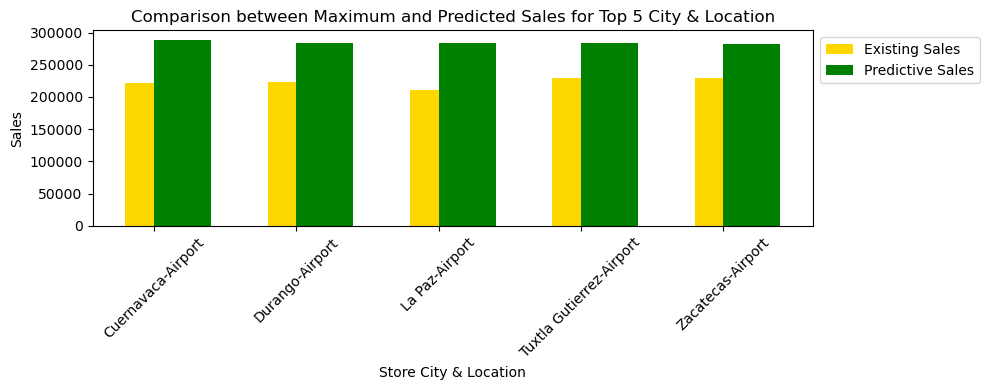

In [67]:
# Combine 'Store_City' and 'Store_Location' into a single column 'Location'
pred_existing_sales_merge['Location'] = pred_existing_sales_merge['Store_City'] + '-' + pred_existing_sales_merge['Prediction_Location']

# Specify the locations you want to display
selected_locations = ['La Paz-Airport', 'Cuernavaca-Airport', 'Durango-Airport', 'Tuxtla Gutierrez-Airport', 'Zacatecas-Airport']

# Filter the original dataframe to include only the specified locations
selected_df = pred_existing_sales_merge[pred_existing_sales_merge['Location'].isin(selected_locations)]

# Plotting
fig, ax = plt.subplots(figsize=(10, 4))

width = 0.4  # Width of the bars
index = range(len(selected_df.index))

# Plotting bars for Existing Sales
ax.bar(selected_df['Location'], selected_df['Existing_Sales'], width=width, label='Existing Sales', align='center', color='gold')

# Plotting bars for Predictive Sales next to Existing Sales
ax.bar(selected_df['Location'], selected_df['Pred_Sales'], width=width, label='Predictive Sales', align='edge', color='green')

ax.set_xlabel('Store City & Location')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
ax.set_ylabel('Sales')
ax.set_title('Comparison between Maximum and Predicted Sales for Top 5 City & Location')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Set legend outside the chart

plt.tight_layout()
plt.show()